In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
train_set = pd.read_csv('train.csv')

In [23]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [24]:
train_set.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [25]:
train_set.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


### 1: unreliable, 0: reliable

In [26]:
unique_authors = train_set['author'].nunique()
unique_authors

4201

In [27]:
train_set.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [28]:
train_set.shape

(20800, 5)

In [29]:
train_set= train_set.dropna()

In [30]:
train_set.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [31]:
train_set['content']= train_set['author']+ ' ' + train_set['title']+ ' ' + train_set['text']

In [32]:
train_set.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [33]:
train_set= train_set.drop(['title','author','text'],axis=1)

In [34]:
train_set.head()

,id,label,content
0,0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,1,Consortiumnews.com Why the Truth Might Get You...
3,3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,1,Howard Portnoy Iranian woman jailed for fictio...


In [35]:
train_set.drop('id', axis=1,inplace=True)
train_set=train_set.reset_index(drop=True)


In [36]:
train_set.head()

,label,content
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,1,Howard Portnoy Iranian woman jailed for fictio...


<Axes: xlabel='label', ylabel='count'>

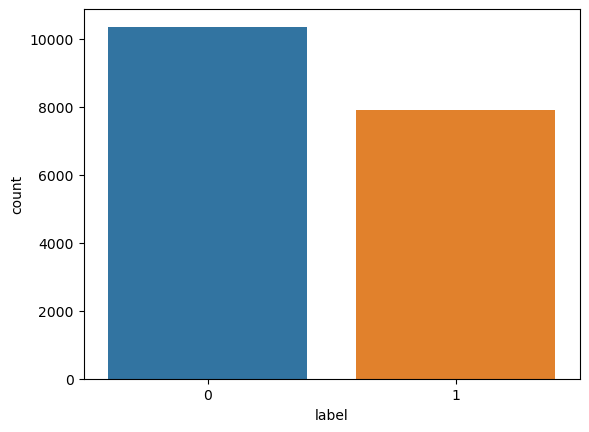

In [37]:
sns.countplot(data=train_set,x=train_set['label'])

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import re

In [39]:
port_stem=PorterStemmer()

In [20]:
# def preprocessing(text):
#     processed_text = re.sub('[^a-zA-Z]',' ',text)
#     processed_text=processed_text.lower().split()
#     processed_text= [port_stem.stem(word) for word in text if word not in stopwords.words('English')]
#     processed_text = ' '.join(processed_text)
#     return processed_text


In [40]:
from tqdm import tqdm
tqdm.pandas()

# Text Preprocessing:
#### replace punctuations with a space, convert text to lower case, remove stopwords, Stemming 

In [41]:
train_set['processed_text'] = train_set['content'].str.replace('[^a-zA-Z]', ' ')
train_set['processed_text'] = train_set['processed_text'].str.lower().str.split()
train_set['processed_text'] = train_set['processed_text'].progress_apply(lambda words: [PorterStemmer().stem(word) for word in words if word not in stopwords.words('english')])
train_set['processed_text'] = train_set['processed_text'].progress_apply(lambda words: ' '.join(words))

C:\Users\yk_th\AppData\Local\Temp\ipykernel_1868\396616230.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_set['processed_text'] = train_set['content'].str.replace('[^a-zA-Z]', ' ')
100%|█████████████████████████████████████████████████████████████████████████| 18285/18285 [00:00<00:00, 22076.40it/s]


In [43]:
train_set.to_csv('processed_train_set.csv', index=False)

In [3]:
train_set = pd.read_csv('processed_train_set.csv')

In [68]:
train_set

,label,content,processed_text
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,darrel lucu hous dem aid even see comey letter...
1,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...",daniel j flynn flynn hillari clinton big woman...
2,1,Consortiumnews.com Why the Truth Might Get You...,consortiumnew com truth might get fire truth m...
3,1,Jessica Purkiss 15 Civilians Killed In Single ...,jessica purkiss civilian kill singl us airstri...
4,1,Howard Portnoy Iranian woman jailed for fictio...,howard portnoy iranian woman jail fiction unpu...
...,...,...,...
18280,0,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...,jerom hudson rapper trump poster child white s...
18281,0,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...",benjamin hoffman n f l playoff schedul matchup...
18282,0,Michael J. de la Merced and Rachel Abrams Macy...,michael j de la merc rachel abram maci said re...
18283,1,"Alex Ansary NATO, Russia To Hold Parallel Exer...",alex ansari nato russia hold parallel exercis ...


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
fake = sum(data['target']==1)
real = sum(data['target']==0)
print('fake: ', fake)
print('real: ',real)
sns.countplot(data = data, x='target').set_title('fake(1) vs real(0)')


### Unreliable news word cloud

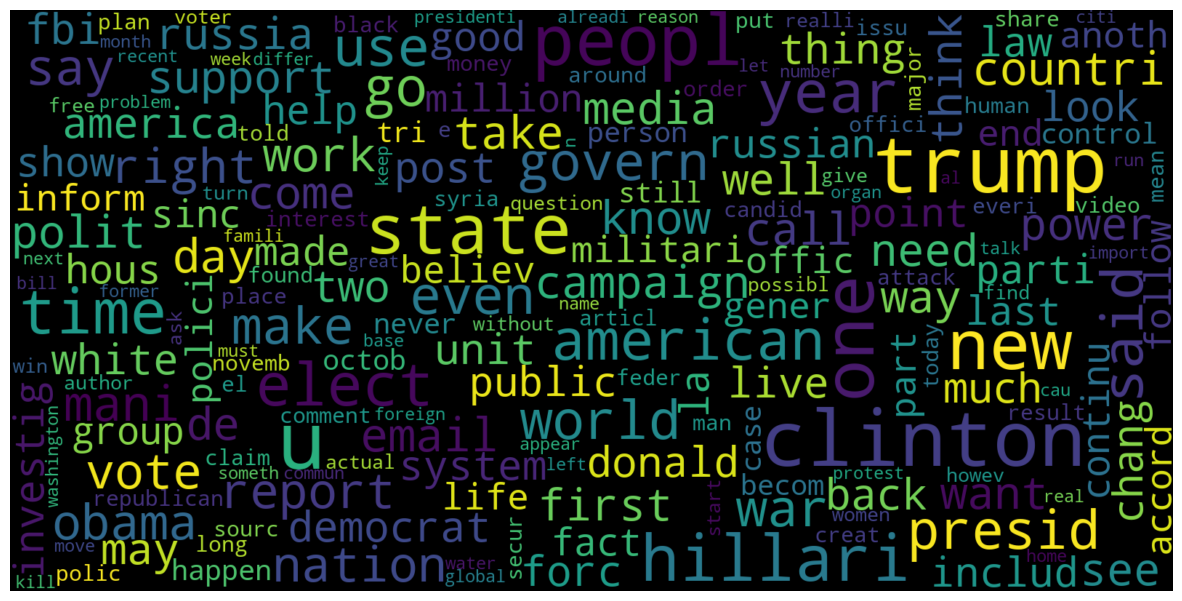

In [46]:
consolidated = ' '.join(word for word in train_set['processed_text'][train_set['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600,height=800,random_state=21,max_font_size=110,collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

### Reliable News Word Cloud

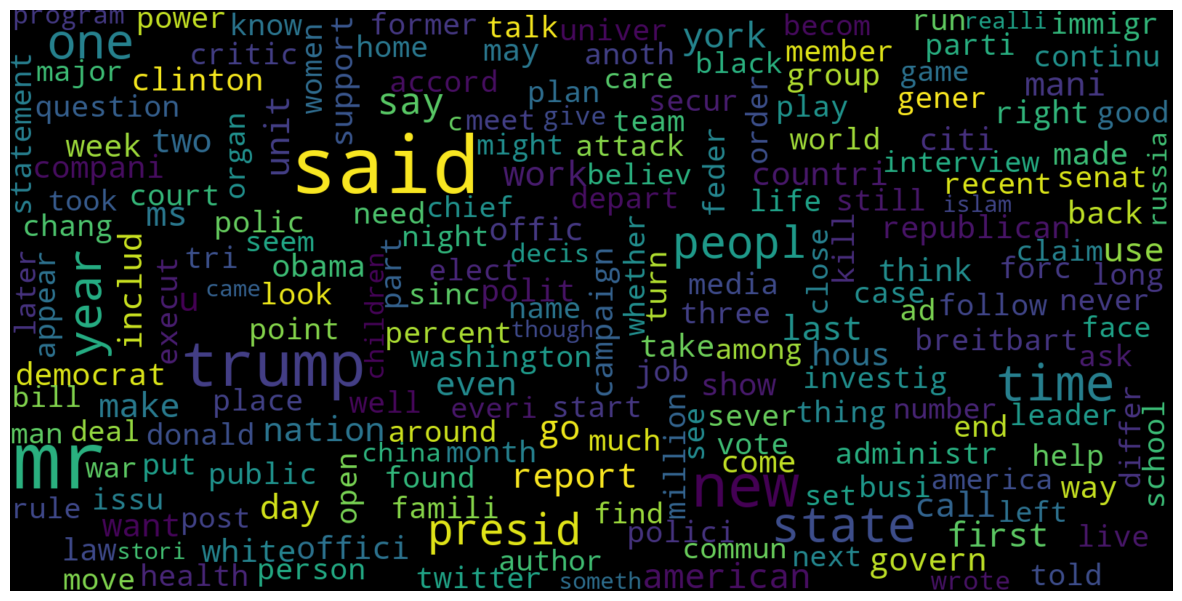

In [47]:
consolidated = ' '.join(
    word for word in train_set['processed_text'][train_set['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
test_set=pd.read_csv('test.csv')
test_set.head()


,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [49]:
test_set= test_set.dropna()

In [50]:
test_set['content']= test_set['author']+ ' ' + test_set['title']+ ' ' + test_set['text']

In [51]:
test_set=test_set.drop(['author', 'title', 'text'],axis=1)

In [52]:
test_set.drop('id', axis=1,inplace=True)
test_set=test_set.reset_index(drop=True)


In [53]:
test_set['processed_text'] = test_set['content'].str.replace('[^a-zA-Z]', ' ')
test_set['processed_text'] = test_set['processed_text'].str.lower().str.split()
test_set['processed_text'] = test_set['processed_text'].progress_apply(lambda words: [PorterStemmer().stem(word) for word in words if word not in stopwords.words('english')])
test_set['processed_text'] = test_set['processed_text'].progress_apply(lambda words: ' '.join(words))

C:\Users\yk_th\AppData\Local\Temp\ipykernel_1868\2828614232.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_set['processed_text'] = test_set['content'].str.replace('[^a-zA-Z]', ' ')
100%|███████████████████████████████████████████████████████████████████████████| 4575/4575 [00:00<00:00, 61342.58it/s]


In [54]:
test_set.to_csv('processed_test_set.csv', index=False)

In [5]:
test_set = pd.read_csv('processed_test_set.csv')

In [56]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [67]:
test_set.head()

,content,processed_text
0,David Streitfeld Specter of Trump Loosens Tong...,david streitfeld specter trump loosen tongu pu...
1,Common Dreams #NoDAPL: Native American Leaders...,common dream nodapl nativ american leader vow ...
2,Daniel Victor Tim Tebow Will Attempt Another C...,daniel victor tim tebow attempt anoth comeback...
3,Truth Broadcast Network Keiser Report: Meme Wa...,truth broadcast network keiser report meme war...
4,Pam Key Pelosi Calls for FBI Investigation to ...,pam key pelosi call fbi investig find russian ...


In [12]:
from sklearn.model_selection import train_test_split

In [14]:
train_set['processed_text'].fillna('', inplace=True)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_set['processed_text'], train_set['label'], test_size=0.33, random_state=42)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer #tdfidfvectorizer is used on sentences, tfidftransformer is 
                                                            #used on a count matrix returned by
                                                            # Countvectorizer

In [17]:
vectorizer =TfidfVectorizer()

In [18]:
X_train=vectorizer.fit_transform(X_train)

In [19]:
X_test = vectorizer.transform(X_test)

In [20]:
def scores(y_test,y_pred,model):
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm ,'\n')
    cr = classification_report(y_test, y_pred)
    print('Classification report:\n', cr ,'\n')

    #scores
    score_train = round(model.score(X_train, y_train),3)
    score_test = round(model.score(X_test, y_test),3)
    print('Training Score: ',score_train)
    print('Testing Score: ',score_test)

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
log_reg = LogisticRegression()

In [79]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [80]:
pred = log_reg.predict(X_test)

In [82]:
scores(y_test,pred,log_reg)

Confusion Matrix:
 [[3325   94]
 [ 164 2452]] 

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      3419
           1       0.96      0.94      0.95      2616

    accuracy                           0.96      6035
   macro avg       0.96      0.95      0.96      6035
weighted avg       0.96      0.96      0.96      6035
 

Training Score:  0.98
Testing Score:  0.957


# XGB

In [83]:
!pip install xgboost

In [85]:
from xgboost import XGBClassifier

In [87]:
xgb = XGBClassifier()

In [88]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [90]:
xgb_pred = xgb.predict(X_test)

In [91]:
scores(y_test, xgb_pred,xgb)

Confusion Matrix:
 [[3355   64]
 [  67 2549]] 

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3419
           1       0.98      0.97      0.97      2616

    accuracy                           0.98      6035
   macro avg       0.98      0.98      0.98      6035
weighted avg       0.98      0.98      0.98      6035
 

Training Score:  1.0
Testing Score:  0.978


# Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
tree= DecisionTreeClassifier()

In [94]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
scores(y_test,tree.predict(X_test),tree)

Confusion Matrix:
 [[3290  129]
 [ 124 2492]] 

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      3419
           1       0.95      0.95      0.95      2616

    accuracy                           0.96      6035
   macro avg       0.96      0.96      0.96      6035
weighted avg       0.96      0.96      0.96      6035
 

Training Score:  1.0
Testing Score:  0.958


# Random forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=10, max_depth=9 , n_jobs=-1)

In [103]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000, n_jobs=-1,
                       random_state=10)

In [104]:
rfc_pred = rfc.predict(X_test)

In [105]:
scores(y_test, rfc_pred,rfc)

Confusion Matrix:
 [[3372   47]
 [ 852 1764]] 

Classification report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88      3419
           1       0.97      0.67      0.80      2616

    accuracy                           0.85      6035
   macro avg       0.89      0.83      0.84      6035
weighted avg       0.87      0.85      0.85      6035
 

Training Score:  0.892
Testing Score:  0.851


# Multinomial Naive Bayes

In [97]:
from sklearn.naive_bayes import MultinomialNB

In [98]:
mnb = MultinomialNB()

In [99]:
mnb.fit(X_train,y_train)

MultinomialNB()

In [100]:
scores(y_test,mnb.predict(X_test),mnb)

Confusion Matrix:
 [[3415    4]
 [1189 1427]] 

Classification report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      3419
           1       1.00      0.55      0.71      2616

    accuracy                           0.80      6035
   macro avg       0.87      0.77      0.78      6035
weighted avg       0.85      0.80      0.79      6035
 

Training Score:  0.831
Testing Score:  0.802


# Predictions

In [60]:
test = vectorizer.transform(test_set['processed_text'])

In [61]:
predictions =tree.predict(test)

In [62]:
test_set['Predictions']= predictions

In [63]:
test_set

,content,processed_text,Predictions
0,David Streitfeld Specter of Trump Loosens Tong...,david streitfeld specter trump loosen tongu pu...,0
1,Common Dreams #NoDAPL: Native American Leaders...,common dream nodapl nativ american leader vow ...,1
2,Daniel Victor Tim Tebow Will Attempt Another C...,daniel victor tim tebow attempt anoth comeback...,0
3,Truth Broadcast Network Keiser Report: Meme Wa...,truth broadcast network keiser report meme war...,1
4,Pam Key Pelosi Calls for FBI Investigation to ...,pam key pelosi call fbi investig find russian ...,0
...,...,...,...
4570,Pam Key Trump on If ’Tapes’ Exist of Comey Con...,pam key trump tape exist comey convers tell ma...,0
4571,Jody Rosen The Bangladeshi Traffic Jam That Ne...,jodi rosen bangladeshi traffic jam never end n...,0
4572,Sheryl Gay Stolberg John Kasich Signs One Abor...,sheryl gay stolberg john kasich sign one abort...,0
4573,"Mike McPhate California Today: What, Exactly, ...",mike mcphate california today exactli sushi ne...,1
